In [ ]:
#Import all library needed
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
import os
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

#confusion matrix visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
### 1. Link notebook with google drive and access data from your personal Gdrive
from google.colab import drive
drive.mount('/content/gdrive')


### 2.Set the data path for dataset and model location (ex: model_loc = "/content/gdrive/My Drive/Dataset/")
dataset_dir = "/content/gdrive/My Drive/BioinfoModelingAndSimulation/"
model_loc = "/content/gdrive/My Drive/BioinfoModelingAndSimulation/"

print(os.listdir(dataset_dir))
data = pd.read_csv(dataset_dir+'heart.csv')

Mounted at /content/gdrive
['heart.csv', 'Heart_Disease_NN.ipynb']


In [ ]:
### 3. Insert Exploratory data analysis (EDA) steps to analyze and investigate datasets.

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
### 4. What is the purpose of the code that sets a list of categorical variables
### in a dataset and then casts those variables to the object data type using the astype() function?

catagorialList = ['sex','cp','fbs','restecg','exang','ca','thal']
for item in catagorialList:
    data[item] = data[item].astype('object') #casting to object

This change the data type to 'object' so it is easier to be manipulated, analyzed and interpreted

In [ ]:
 ### 5. Create more data by categorical variable into indicator variables using 'get_dummies' function

data = pd.get_dummies(data, drop_first=True)

<ipython-input-11-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-11-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-11-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-11-76ef3ba0124a>:3: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  data = pd.get_dummies(data, drop_first=True)
<ipython-input-11-76ef3ba0124a>:3: FutureWarning: In a future version, t

In [ ]:
### 6. Explain line 3,4 and 5 and print the shape of x and y

y = data['target'].values
y = y.reshape(y.shape[0],1)
x = data.drop(['target'],axis=1)
##
print('shape of x: ', x.shape)
print('shape of y: ', y.shape)

shape of x:  (303, 21)
shape of y:  (303, 1)


line 3: take the target value;
line 4: reshape y array to be 1 dimension;
line 5: drop 'target' data in x data

In [ ]:
### 7. Create a simple dataset and demonstrate the normalization code on the simple dataset

#Create a simple dataset
data = pd.DataFrame({'A': [10, 20, 30], 'B': [100, 200, 300], 'C': [1000, 2000, 3000]})
print('Original dataset: ')
print(data)


Original dataset: 
    A    B     C
0  10  100  1000
1  20  200  2000
2  30  300  3000


In [ ]:
### 8. Describe the heart dataset after implementing the min max normalization
#Normalize data (range 0 - 1)
minx = np.min(x)
maxx = np.max(x)
x = (x - minx) / (maxx - minx)
x.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


,age,trestbps,chol,thalach,oldpeak,slope,sex_1,cp_1,cp_2,cp_3,...,restecg_1,restecg_2,exang_1,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.562500,0.245283,0.251142,0.816794,0.129032,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.583333,0.245283,0.520548,0.702290,0.096774,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


After applying min-max normalization to the heart dataset, all values are scaled to a range between 0 and 1. This ensures uniformity in the scale of features, facilitating better learning for machine learning algorithms.

In [ ]:
### 9. Modify the code to split the dataset into train and test (train 70%, val 20% and test 10%).

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# re-create train and validation set
x_train, x_val, y_train, y_val  = train_test_split(x_train, y_train, test_size=1/3, random_state=42)
# train 70%, validation 20%, test 10%
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(141, 21)
(71, 21)
(91, 21)


In [ ]:
### 10. What is the purpose of each layer in the neural network created using the Sequential() function with 64, 32, and 1 neurons,
### respectively, and softmax and sigmoid activation functions?

model = Sequential() #Allow us to create model layer by layer
model.add(Dense(64, input_dim=21, activation='softmax')) #Softmax turn number data into probabilities which sum to 1
model.add(Dense(32, activation='softmax'))
model.add(Dense(1, activation='sigmoid')) # produce probability value (number between 0 or 1)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3521 (13.75 KB)
Trainable params: 3521 (13.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


First Layer (Dense with 64 neurons and softmax activation):

Purpose: The first layer typically serves as the input layer. It receives the input data and performs the initial processing.
Activation Function: Softmax converts the raw output of the layer into a probability distribution over multiple classes. It's commonly used in multi-class classification problems to produce probabilities that sum up to 1.

Second Layer (Dense with 32 neurons and softmax activation):

Purpose: This layer serves as a hidden layer in the neural network. It learns complex patterns and features from the input data.
Activation Function: Similar to the first layer, softmax activation is used here.

Third Layer (Dense with 1 neuron and sigmoid activation):

Purpose: The final layer serves as the output layer of the neural network. It produces the final predictions or outputs.
Activation Function: Sigmoid squashes the raw output of the layer into the range [0, 1], which is suitable for binary classification tasks. It produces probability values representing the likelihood of belonging to the positive class.

In [ ]:
### 11. This code compiles a neural network model with a mean squared error loss function, the Adam optimizer with a learning rate of 0.01,
### and accuracy as a performance metric. What does each of these components mean, and how do they affect the model training and performance?

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False,name='Adam'),
              metrics=['acc'])

1. **Loss Function (`loss='mse'`)**: Measures how well the model's predictions match the actual values during training. MSE (Mean Squared Error) is used here for regression problems, aiming to minimize the average squared difference between predicted and actual values.

2. **Optimizer (`optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)`)**: Controls how the model's parameters are updated to minimize the loss. Adam optimizer is adaptive and adjusts learning rates for each parameter based on past gradients. Learning rate of 0.01 sets the step size for parameter updates.

3. **Metrics (`metrics=['acc']`)**: Used to assess model performance during training and testing. 'acc' stands for accuracy, measuring the percentage of correctly classified samples. The model will report accuracy as a performance metric during training.

In [ ]:
# start the model training
output = []
early = EarlyStopping(monitor='val_acc', patience=400, mode='auto')
checkpoint = ModelCheckpoint(model_loc+"heart_disease_best_model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='auto', save_freq='epoch')
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.01, patience=100, verbose=1, mode='auto', min_lr=0.001)
callbacks_list = [early]

output = model.fit(x_train, y_train,validation_data=(x_val,y_val), epochs=1000, batch_size=16, verbose=1, callbacks=callbacks_list)

Epoch 1/1000
9/9 [==============================] - 2s 55ms/step - loss: 0.2523 - acc: 0.4397 - val_loss: 0.2499 - val_acc: 0.4930
Epoch 2/1000
9/9 [==============================] - 0s 12ms/step - loss: 0.2483 - acc: 0.5887 - val_loss: 0.2496 - val_acc: 0.5070
Epoch 3/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2473 - acc: 0.5603 - val_loss: 0.2499 - val_acc: 0.5070
Epoch 4/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2447 - acc: 0.5603 - val_loss: 0.2486 - val_acc: 0.5070
Epoch 5/1000
9/9 [==============================] - 0s 11ms/step - loss: 0.2429 - acc: 0.5603 - val_loss: 0.2463 - val_acc: 0.5070
Epoch 6/1000
9/9 [==============================] - 0s 10ms/step - loss: 0.2386 - acc: 0.5603 - val_loss: 0.2411 - val_acc: 0.5070
Epoch 7/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2327 - acc: 0.5603 - val_loss: 0.2327 - val_acc: 0.5070
Epoch 8/1000
9/9 [==============================] - 0s 13ms/step - loss: 0.2235 - a

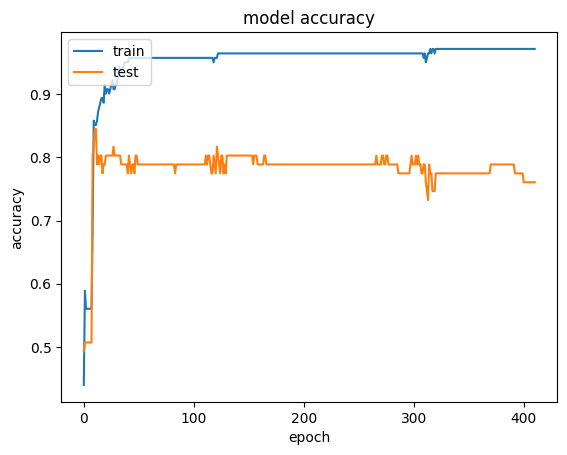

In [ ]:
### 12. What does the plot generated by this code represent?

plt.plot(output.history['acc'])
plt.plot(output.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('Accuracy.png',dpi=100) #to save the image
plt.show()

- **X-axis (`epoch`)**: Represents the number of training epochs. An epoch is one complete pass through the entire training dataset.
- **Y-axis (`accuracy`)**: Represents the accuracy of the model. Accuracy is a metric that measures the proportion of correctly classified samples.
- **Blue Line (`train`)**: Represents the model accuracy on the training dataset over epochs. It shows how the accuracy of the model improves or changes during the training process.
- **Orange Line (`test`)**: Represents the model accuracy on the validation dataset over epochs. It shows how well the model generalizes to unseen data during training.
- **Title (`model accuracy`)**: Describes the title of the plot, indicating that it represents the model accuracy.
- **Y-axis Label (`accuracy`)**: Describes the label for the y-axis, indicating that it represents accuracy.
- **X-axis Label (`epoch`)**: Describes the label for the x-axis, indicating that it represents the number of epochs.
- **Legend (`train`, `test`)**: Describes the lines in the plot, indicating which line represents the training accuracy (`train`) and which line represents the validation accuracy (`test`).

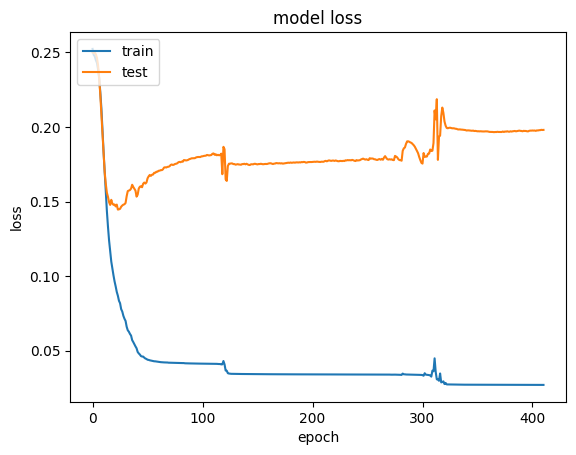

In [ ]:
### 13. Plot code for the model loss. You can refer to the plot code for model accuracy above.
plt.plot(output.history['loss'])
plt.plot(output.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.savefig('loss.png',dpi=100) #to save the image
plt.show()

In [ ]:
### 14. What is the purpose of evaluating the model on the test dataset?

#model.load_weights(model_loc+"heart_disease_best_model.hdf5")
scores = model.evaluate(x_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# print("\n%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("loss:", round(scores[0],2))

3/3 [==============================] - 0s 5ms/step - loss: 0.1599 - acc: 0.8132

acc: 81.32%
loss: 0.16


Evaluating the model on the test dataset helps assess its performance on unseen data, identify overfitting, measure performance metrics, and make decisions about deploying the model in real-world applications.

In [ ]:
#Display detailed prediction
pred = model.predict(x_test)
y = np.round(pred).astype("int16")
idx = 0
ps = 0
fl = 0
for x in pred:
    if y_test[idx]==y[idx]:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx],"Result: \033[92mPass")
        ps = ps+1
    else:
        print("\033[30mNo:",idx+1,"Actual:",y_test[idx]," Predicted:",y[idx]," Result: \033[91mFail")
        fl = fl+1
    idx = idx + 1
print("\033[30mRight Prediction :",ps, "Wrong Prediction :",fl)

3/3 [==============================] - 0s 4ms/step
No: 1 Actual: [0]  Predicted: [0] Result: Pass
No: 2 Actual: [0]  Predicted: [1]  Result: Fail
No: 3 Actual: [1]  Predicted: [1] Result: Pass
No: 4 Actual: [0]  Predicted: [0] Result: Pass
No: 5 Actual: [1]  Predicted: [1] Result: Pass
No: 6 Actual: [1]  Predicted: [1] Result: Pass
No: 7 Actual: [1]  Predicted: [1] Result: Pass
No: 8 Actual: [0]  Predicted: [0] Result: Pass
No: 9 Actual: [0]  Predicted: [0] Result: Pass
No: 10 Actual: [1]  Predicted: [0]  Result: Fail
No: 11 Actual: [1]  Predicted: [1] Result: Pass
No: 12 Actual: [1]  Predicted: [0]  Result: Fail
No: 13 Actual: [1]  Predicted: [1] Result: Pass
No: 14 Actual: [0]  Predicted: [0] Result: Pass
No: 15 Actual: [1]  Predicted: [1] Result: Pass
No: 16 Actual: [1]  Predicted: [1] Result: Pass
No: 17 Actual: [1]  Predicted: [1] Result: Pass
No: 18 Actual: [0]  Predicted: [0] Result: Pass
No: 19 Actual: [0]  Predicted: [0] Result: Pass
No: 20 Actual: [0]  Predicted: [0] Result: 

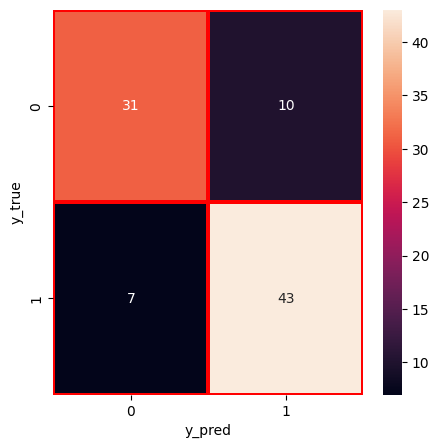


              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



In [ ]:
### 15. What is Confusion Matrix and why you need it? Explain TP, FP, FN, TN.
### 16. Explain the classification report produce.

y_pred = y
y_true = y_test

cm = confusion_matrix(y_true, y_pred, labels=[0,1])
#cm = confusion_matrix(y_true, y_pred, labels=labels.astype('int'))
f, ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=1.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()
print()
print(classification_report(y_true, y_pred, labels=[0,1]))

True Positive (TP): The number of correctly predicted positive instances (actual positive instances correctly classified as positive).
False Positive (FP): The number of incorrectly predicted positive instances (actual negative instances incorrectly classified as positive).
False Negative (FN): The number of incorrectly predicted negative instances (actual positive instances incorrectly classified as negative).
True Negative (TN): The number of correctly predicted negative instances (actual negative instances correctly classified as negative).

why you need it?
The confusion matrix provides valuable insights into the performance of a classification model, especially in binary classification tasks.

 Explain the classification report produce

There are 31 TP, 7 FP, 10 FN and 43 TN.

For class 0:

The precision is 0.82, means 82% of instances predicted as class 0 are actually class 0.

The recall is 0.76, means the model identify correctly 76% of all actual class 0.

F1-score is 0.78, which is the harmonic mean of precision and recall for class 0.

Support 41, means there are 41 instances of class 0 in the dataset.

For class 1:

The precision is 0.81, means 81% of instances predicted as class 0 are actually class 0.

The recall is 0.86, means the model identify correctly 86% of all actual class 0.

F1-score is 0.83, which is the harmonic mean of precision and recall for class 0.

Support 50, means there are 50 instances of class 0 in the dataset.

Macro avg 0.81 is the average of precision, recall, and F1-score calculated independently for each class.

Weight avg 0.81 is the average of precision, recall, and F1-score weighted by the support for each class.